y is fraud 7641
y is not fraud 7641
explained variance ratio (first two components): [0.99723449 0.00276551]


C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Text(0.5, 1.0, 'PCA of Identity dataset')

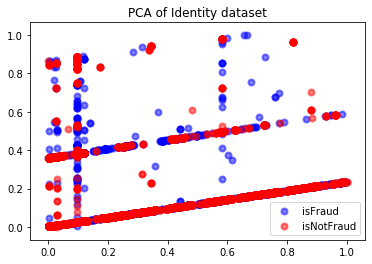

In [43]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('cleaned train_identity.csv')
df = df.drop('Unnamed: 0', axis = 1)
X = df.drop(['isFraud', 'TransactionID'], axis=1)
X = X[['id_17', 'DeviceInfo']]
y = df['isFraud']
print('y is fraud',len(y[y==1]))
print('y is not fraud',len(y[y==0]))
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_r)
#mm_scaler.transform(X_test)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

#or x in range(1):
plt.scatter(X_train_minmax[y == 0, 0], X_train_minmax[y == 0, 1], color='blue', alpha=.5, lw=2,
                    label='isFraud')
plt.scatter(X_train_minmax[y == 1, 0], X_train_minmax[y == 1, 1], color='red', alpha=.5, lw=2,
                    label='isNotFraud')

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Identity dataset')
